In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Datasets/PlantVillage'

binary_classes = ['Pepper__bell___Bacterial_spot', 'Potato___healthy']
all_classes = ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Pepper__bell___healthy']

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_binary_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=binary_classes,
    subset='training'
)

validation_binary_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=binary_classes,
    subset='validation'
)

train_multiclass_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=all_classes,
    subset='training'
)

validation_multiclass_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=all_classes,
    subset='validation'
)

def create_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

Found 920 images belonging to 2 classes.
Found 229 images belonging to 2 classes.
Found 2103 images belonging to 3 classes.
Found 524 images belonging to 3 classes.


In [ ]:
binary_model = create_model(1)
binary_model.compile(loss='binary_crossentropy',
                     optimizer=Adam(learning_rate=0.0001),
                     metrics=['accuracy'])

binary_checkpoint = ModelCheckpoint('binary_classifier.h5', save_best_only=True)
binary_early_stopping = EarlyStopping(patience=10)

history_binary = binary_model.fit(
    train_binary_generator,
    steps_per_epoch=len(train_binary_generator),
    epochs=10,
    validation_data=validation_binary_generator,
    validation_steps=len(validation_binary_generator),
    callbacks=[binary_checkpoint, binary_early_stopping]
)

Epoch 1/10
29/29 [==============================] - 48s 2s/step - loss: 0.4214 - accuracy: 0.1326 - val_loss: 0.3595 - val_accuracy: 0.1310
Epoch 2/10
29/29 [==============================] - 45s 2s/step - loss: 0.3419 - accuracy: 0.1326 - val_loss: 0.2958 - val_accuracy: 0.1310
Epoch 3/10
29/29 [==============================] - 51s 2s/step - loss: 0.2648 - accuracy: 0.1326 - val_loss: 0.2440 - val_accuracy: 0.1310
Epoch 4/10
29/29 [==============================] - 46s 2s/step - loss: 0.2278 - accuracy: 0.1326 - val_loss: 0.2120 - val_accuracy: 0.1310
Epoch 5/10
29/29 [==============================] - 44s 1s/step - loss: 0.1972 - accuracy: 0.1326 - val_loss: 0.2136 - val_accuracy: 0.1310
Epoch 6/10
29/29 [==============================] - 46s 2s/step - loss: 0.1963 - accuracy: 0.1326 - val_loss: 0.1764 - val_accuracy: 0.1310
Epoch 7/10
29/29 [==============================] - 44s 2s/step - loss: 0.1758 - accuracy: 0.1326 - val_loss: 0.1721 - val_accuracy: 0.1310
Epoch 8/10
29/29 [==

In [ ]:
multiclass_model = create_model(3)

for i, layer in enumerate(multiclass_model.layers[:-2]):
    layer.set_weights(binary_model.layers[i].get_weights())

multiclass_model.compile(loss='categorical_crossentropy',
                         optimizer=Adam(learning_rate=0.0001),
                         metrics=['accuracy'])

multiclass_checkpoint = ModelCheckpoint('multiclass_classifier.h5', save_best_only=True)
multiclass_early_stopping = EarlyStopping(patience=10)

history_multiclass = multiclass_model.fit(
    train_multiclass_generator,
    steps_per_epoch=len(train_multiclass_generator),
    epochs=10,
    validation_data=validation_multiclass_generator,
    validation_steps=len(validation_multiclass_generator),
    callbacks=[multiclass_checkpoint, multiclass_early_stopping]
)

Epoch 1/10
66/66 [==============================] - 104s 2s/step - loss: 0.6914 - accuracy: 0.7076 - val_loss: 0.4993 - val_accuracy: 0.8550
Epoch 2/10
66/66 [==============================] - 114s 2s/step - loss: 0.5369 - accuracy: 0.8359 - val_loss: 0.4627 - val_accuracy: 0.8378
Epoch 3/10
66/66 [==============================] - 118s 2s/step - loss: 0.5041 - accuracy: 0.8455 - val_loss: 0.4992 - val_accuracy: 0.8282
Epoch 4/10
66/66 [==============================] - 105s 2s/step - loss: 0.4473 - accuracy: 0.8540 - val_loss: 0.3914 - val_accuracy: 0.8817
Epoch 5/10
66/66 [==============================] - 107s 2s/step - loss: 0.4048 - accuracy: 0.8616 - val_loss: 0.3770 - val_accuracy: 0.8607
Epoch 6/10
66/66 [==============================] - 106s 2s/step - loss: 0.3849 - accuracy: 0.8768 - val_loss: 0.3987 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 103s 2s/step - loss: 0.3626 - accuracy: 0.8754 - val_loss: 0.3372 - val_accuracy: 0.8798
Epoch 8/10
66

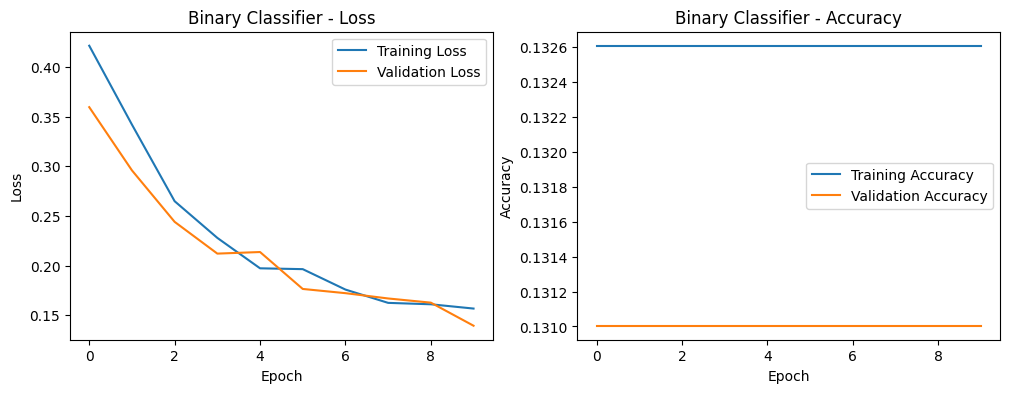

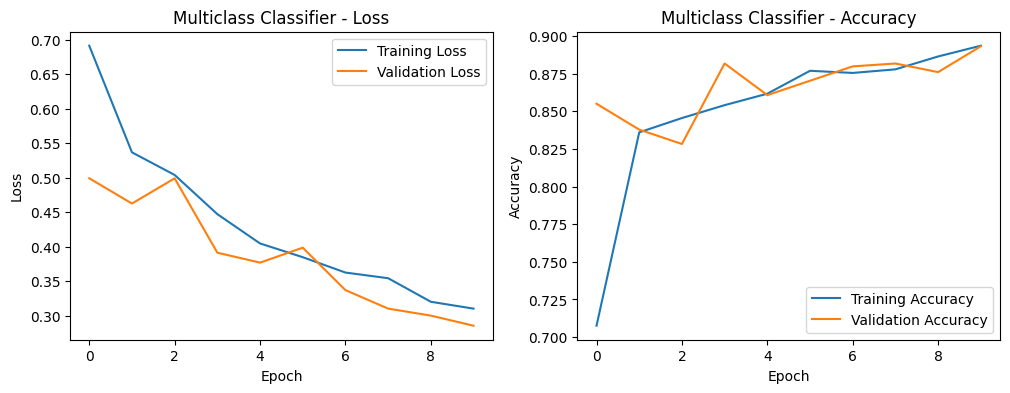

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')
    
    plt.show()

plot_history(history_binary, 'Binary Classifier')
plot_history(history_multiclass, 'Multiclass Classifier')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_binary_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=binary_classes,
)

test_multiclass_generator = test_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    classes=all_classes,
)

from tensorflow.keras.models import load_model

best_binary_model = load_model('binary_classifier.h5')
best_multiclass_model = load_model('multiclass_classifier.h5')

binary_scores = best_binary_model.evaluate(test_binary_generator)
multiclass_scores = best_multiclass_model.evaluate(test_multiclass_generator)

print("Binary Classifier - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(binary_scores[0], binary_scores[1]))
print("Multiclass Classifier - Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(multiclass_scores[0], multiclass_scores[1]))

import pandas as pd

results = pd.DataFrame({'Model': ['Binary Classifier', 'Multiclass Classifier'],
                        'Test Loss': [binary_scores[0], multiclass_scores[0]],
                        'Test Accuracy': [binary_scores[1], multiclass_scores[1]]})

results.set_index('Model', inplace=True)
display(results)

Found 1149 images belonging to 2 classes.
Found 2627 images belonging to 3 classes.
83/83 [==============================] - 36s 428ms/step - loss: 0.3769 - accuracy: 0.8710
Binary Classifier - Test Loss: 0.2263, Test Accuracy: 0.1323
Multiclass Classifier - Test Loss: 0.3769, Test Accuracy: 0.8710


,Test Loss,Test Accuracy
Model,,
Binary Classifier,0.226302,0.132289
Multiclass Classifier,0.376908,0.870955
